In [1]:
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
import sys
import cv2

ModuleNotFoundError: No module named 'torch'

In [2]:

model = YOLO('yolo12n.pt') 

In [3]:

dataset_path = Path('E:\Python\Data Science\Road Damage\pothole_detection_CNN\DatasetV12\data.yaml')
if not dataset_path.exists():
    print(f"Error: data.yaml not found at {dataset_path}")
    print("Please run prepare_dataset.py first")
    sys.exit(1)

In [4]:
# Verify dataset structure
required_dirs = [
    'E:\\Python\\Data Science\\Road Damage\\pothole_detection_CNN\\DatasetV12\\images\\train',
    'E:\\Python\\Data Science\\Road Damage\\pothole_detection_CNN\\DatasetV12\\images\\val',
    'E:\\Python\\Data Science\\Road Damage\\pothole_detection_CNN\\DatasetV12\\images\\test',
    'E:\\Python\\Data Science\\Road Damage\\pothole_detection_CNN\\DatasetV12\\labels\\train',
    'E:\\Python\\Data Science\\Road Damage\\pothole_detection_CNN\\DatasetV12\\labels\\val',
    'E:\\Python\\Data Science\\Road Damage\\pothole_detection_CNN\\DatasetV12\\labels\\test'
]
for dir_path in required_dirs:
    if not Path(dir_path).exists():
        print(f"Error: Required directory {dir_path} does not exist")
        print("Please run prepare_dataset.py first")
        sys.exit(1)

In [5]:
# Train the model
try:
    print("Starting training...")
    print(f"Using dataset at: {dataset_path.absolute()}")
    
    results = model.train(
        data=str(dataset_path),  # path to data.yaml file
        epochs=20,              # number of epochs
        imgsz=640,             # image size
        batch=16,              # batch size
        name='road_damage_detection',  # experiment name
        device='cpu'           # use CPU for training
    )
    print("Training completed successfully!")
    
except Exception as e:
    print(f"Error during training: {str(e)}")
    sys.exit(1)

Starting training...
Using dataset at: E:\Python\Data Science\Road Damage\pothole_detection_CNN\DatasetV12\data.yaml
Ultralytics 8.3.131  Python-3.10.11 torch-2.7.0+cpu CPU (AMD Ryzen 7 4700U with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=E:\Python\Data Science\Road Damage\pothole_detection_CNN\DatasetV12\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=1.0

train: Scanning E:\Python\Data Science\Road Damage\pothole_detection_CNN\DatasetV12\labels\train.cache... 962 images, 1 backgrounds, 0 corrupt: 100%|██████████| 962/962 [00:00<?, ?it/s]

val: Fast image access  (ping: 0.20.1 ms, read: 99.324.2 MB/s, size: 66.2 KB)



e:\Python\Data Science\Road Damage\pothole_detection_CNN\venv\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning E:\Python\Data Science\Road Damage\pothole_detection_CNN\DatasetV12\labels\val.cache... 192 images, 0 backgrounds, 0 corrupt: 100%|██████████| 192/192 [00:00<?, ?it/s]
e:\Python\Data Science\Road Damage\pothole_detection_CNN\venv\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to e:\Python\Data Science\Road VGG19\runs\detect\road_damage_detection4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to e:\Python\Data Science\Road VGG19\runs\detect\road_damage_detection4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G       1.66      3.033      2.006          6        640: 100%|██████████| 61/61 [20:38<00:00, 20.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:17<00:00, 12.91s/it]

                   all        192        335      0.168      0.317      0.154      0.069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.734      2.549      2.035          8        640: 100%|██████████| 61/61 [21:18<00:00, 20.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:12<00:00, 12.11s/it]

                   all        192        335      0.318      0.368      0.165     0.0604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.728      2.482      2.051          8        640: 100%|██████████| 61/61 [20:31<00:00, 20.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:11<00:00, 11.86s/it]

                   all        192        335      0.139      0.226      0.113      0.032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.699      2.398      2.034          5        640: 100%|██████████| 61/61 [20:03<00:00, 19.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:10<00:00, 11.82s/it]

                   all        192        335      0.187      0.236      0.152     0.0563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.639      2.317      1.991          7        640: 100%|██████████| 61/61 [20:25<00:00, 20.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:09<00:00, 11.64s/it]

                   all        192        335      0.784      0.235      0.212     0.0797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.615      2.275      1.955          5        640: 100%|██████████| 61/61 [20:14<00:00, 19.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:10<00:00, 11.73s/it]

                   all        192        335        0.3        0.3       0.24      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.627      2.268      1.963          5        640: 100%|██████████| 61/61 [19:41<00:00, 19.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:10<00:00, 11.72s/it]

                   all        192        335      0.279      0.466      0.319      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G       1.61      2.118      1.941          8        640: 100%|██████████| 61/61 [19:20<00:00, 19.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:09<00:00, 11.61s/it]

                   all        192        335      0.489      0.416      0.369      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.564      2.163      1.916         10        640: 100%|██████████| 61/61 [20:15<00:00, 19.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:09<00:00, 11.57s/it]

                   all        192        335      0.436      0.424      0.337      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G       1.55      2.126      1.913          5        640: 100%|██████████| 61/61 [21:06<00:00, 20.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:09<00:00, 11.58s/it]

                   all        192        335      0.445      0.475       0.41      0.183


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


e:\Python\Data Science\Road Damage\pothole_detection_CNN\venv\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
      11/20         0G      1.705      2.225      2.197          2        640: 100%|██████████| 61/61 [18:58<00:00, 18.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:08<00:00, 11.49s/it]

                   all        192        335      0.561      0.433      0.449      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.678      2.053      2.215          3        640: 100%|██████████| 61/61 [18:42<00:00, 18.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:09<00:00, 11.52s/it]

                   all        192        335      0.496      0.455       0.44        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G       1.65      2.014       2.16          7        640: 100%|██████████| 61/61 [18:59<00:00, 18.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:08<00:00, 11.35s/it]

                   all        192        335      0.637      0.496      0.514      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.605      1.932      2.118          2        640: 100%|██████████| 61/61 [18:42<00:00, 18.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:08<00:00, 11.43s/it]

                   all        192        335      0.696      0.508      0.546       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.563       1.84      2.079          2        640: 100%|██████████| 61/61 [19:03<00:00, 18.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:08<00:00, 11.44s/it]

                   all        192        335      0.608      0.513      0.524      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.554        1.8      2.087          9        640: 100%|██████████| 61/61 [19:09<00:00, 18.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:08<00:00, 11.45s/it]

                   all        192        335      0.603      0.566       0.56       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.547      1.767      2.049          6        640: 100%|██████████| 61/61 [19:07<00:00, 18.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:09<00:00, 11.51s/it]

                   all        192        335      0.621      0.524      0.547      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.536      1.695      2.062          2        640: 100%|██████████| 61/61 [19:10<00:00, 18.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:09<00:00, 11.51s/it]

                   all        192        335      0.627      0.576      0.591      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.483      1.672      1.991          4        640: 100%|██████████| 61/61 [18:51<00:00, 18.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:10<00:00, 11.69s/it]

                   all        192        335      0.634       0.58      0.594      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.474      1.624      2.013          2        640: 100%|██████████| 61/61 [19:45<00:00, 19.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [01:15<00:00, 12.61s/it]

                   all        192        335       0.66      0.566      0.602      0.293



20 epochs completed in 6.965 hours.
Optimizer stripped from e:\Python\Data Science\Road VGG19\runs\detect\road_damage_detection4\weights\last.pt, 5.5MB
Optimizer stripped from e:\Python\Data Science\Road VGG19\runs\detect\road_damage_detection4\weights\best.pt, 5.5MB

Validating e:\Python\Data Science\Road VGG19\runs\detect\road_damage_detection4\weights\best.pt...
Ultralytics 8.3.131  Python-3.10.11 torch-2.7.0+cpu CPU (AMD Ryzen 7 4700U with Radeon Graphics)
YOLOv12n summary (fused): 159 layers, 2,557,313 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:57<00:00,  9.54s/it]


                   all        192        335      0.663      0.565      0.602      0.293
                 Crack         76         98      0.646      0.449      0.513      0.244
               Pothole         64        153      0.644      0.579      0.609      0.233
       Surface Erosion         74         84      0.698      0.667      0.685      0.403
Speed: 5.8ms preprocess, 277.8ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to e:\Python\Data Science\Road VGG19\runs\detect\road_damage_detection4
Training completed successfully!


In [26]:
metrics = results.val()

AttributeError: 'list' object has no attribute 'val'

In [15]:
#Function to predict on new images
def predict_image(model, image_path):
    results = model(image_path)
    print(results)
    return results[0] 

In [23]:
def plot_predictions(image_path, results):
    plt.figure(figsize=(10, 10))
    plt.imshow(results[0].plot())  # Access the first item in the results list
    plt.axis('off')
    plt.show()

In [24]:

test_image_path = Path('E:\Python\Data Science\Road Damage\pothole_detection_CNN\DatasetV12\images\\test\\41_jpg.rf.d926b3ebc87c1cbb64bf2da4a893e9fa.jpg')
plot_predictions(test_image_path, results)

<Figure size 1000x1000 with 1 Axes>

In [21]:
if test_image_path.exists():
    results = predict_image(model, test_image_path)
    plot_predictions(test_image_path, results)
    for r in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = r
        print(f"Detected class {int(class_id)} with confidence {score:.2f}")
else:
    print(f"Test image not found at {test_image_path}") 


image 1/1 E:\Python\Data Science\Road Damage\pothole_detection_CNN\DatasetV12\images\test\41_jpg.rf.d926b3ebc87c1cbb64bf2da4a893e9fa.jpg: 640x640 (no detections), 570.1ms
Speed: 10.5ms preprocess, 570.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'b

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 1 Axes>

In [27]:
# Load the trained model
model = YOLO("E:\Python\Data Science\Road Damage\pothole_detection_CNN\\runs\detect\\road_damage_detection4\weights\\best.pt")

# Predict on an image
results = model.predict("E:\Python\Data Science\Road Damage\pothole_detection_CNN\Test random data\p1.jpeg", save=False, show=False)
# Get the annotated image (with bounding boxes)
annotated_img = results[0].plot()  # returns a numpy array (BGR)

# Convert BGR to RGB for correct display in matplotlib
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

# Display it inline in Jupyter
plt.figure(figsize=(8, 5))
plt.imshow(annotated_img_rgb)
plt.axis('off')
plt.title("YOLOv8 Prediction - Pothole Detection")
plt.show()


image 1/1 E:\Python\Data Science\Road Damage\pothole_detection_CNN\Test random data\p1.jpeg: 480x640 1 Pothole, 294.1ms
Speed: 4.0ms preprocess, 294.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


<Figure size 800x500 with 1 Axes>


image 1/1 E:\Python\Data Science\Road Damage\pothole_detection_CNN\Dataset\Surface Erosion\129.jpg: 640x640 1 Surface Erosion, 206.8ms
Speed: 6.0ms preprocess, 206.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to e:\Python\Data Science\Road VGG19\runs\detect\predict19


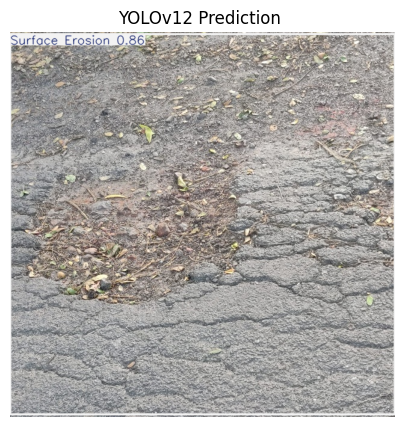

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load model
model = YOLO(r"E:\Python\Data Science\Road Damage\pothole_detection_CNN\runs\detect\road_damage_detection4\weights\best.pt")

# Predict on an image
img_path = r"E:\Python\Data Science\Road Damage\pothole_detection_CNN\Dataset\Surface Erosion\129.jpg"
results = model.predict(img_path, save=True, show=False)

# Check predictions
if results and results[0].boxes is not None:
    annotated_img = results[0].plot()
    annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 5))
    plt.imshow(annotated_img_rgb)
    plt.axis('off')
    plt.title("YOLOv12 Prediction ")
    plt.show()
else:
    print("No detections found.")
